<h1 align="center" style="color:blue"><u>Exploratory Data Analysis on h1b Dataset</u></h1>

<h3 align="right"> ~ Sriansh Raj Pradhan </h3>

   ## import required libraries -

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

   ## Dataset of the project - 

In [7]:
df = pd.read_csv("h1b.csv", encoding='latin-1')
df.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",PA,2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA"
1,I-200-09341-564186,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER*",15-1799,QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,PA,2015,PENNSYLVANIA,"CAMP HILL, PENNSYLVANIA"
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,IL,2015,ILLINOIS,"CHICAGO, ILLINOIS"
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,NY,2015,NEW YORK,"AUBURN, NEW YORK"
4,I-200-10006-413683,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,15-1142,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,NY,2015,NEW YORK,"BETHPAGE, NEW YORK"


In [8]:
df.tail()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE
857211,I-200-19053-522403,CERTIFIED,JETBLUE AIRWAYS,TRANSPORTATION INSPECTORS,53-6051,SENIOR INVESTIGATOR AIR SAFETY,Y,74152.0,Long Island City,NEWYORK,2019,NEW YORK,"Long Island City, NEW YORK"
857212,I-200-18282-647333,CERTIFIED,AMERICAN FAMILY MUTUAL INSURANCE COMPANY,15-2031,OPERATIONS RESEARCH ANALYSTS,DIGITAL TOUCHPOINTS ANALYST,Y,75733.0,MADISON,WI,2019,WISCONSIN,"MADISON, WISCONSIN"
857213,I-200-19046-203745,DENIED,CAPGEMINI AMERICA INC,NaN,NaN,APPLICATIONS CONSULTANT 2,Y,80704.0,DEARBORN,MICHIGAN,2019,MICHIGAN,"DEARBORN, MICHIGAN"
857214,I-200-19059-900658,DENIED,CAPGEMINI AMERICA INC,NaN,NaN,BUSINESS SYSTEMS ANALYST 2,Y,74443.0,NEW YORK,NEWYORK,2019,NEW YORK,"NEW YORK, NEW YORK"
857215,I-200-19073-908844,DENIED,CAPGEMINI AMERICA INC,NaN,NaN,BUSINESS SYSTEMS ANALYST 2,Y,66643.0,MADISON,WISCONSIN,2019,WISCONSIN,"MADISON, WISCONSIN"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857216 entries, 0 to 857215
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CASE_NUMBER          857216 non-null  object 
 1   CASE_STATUS          857216 non-null  object 
 2   EMPLOYER_NAME        857195 non-null  object 
 3   SOC_NAME             857210 non-null  object 
 4   SOC_CODE             857212 non-null  object 
 5   JOB_TITLE            857211 non-null  object 
 6   FULL_TIME_POSITION   857215 non-null  object 
 7   PREVAILING_WAGE      857212 non-null  float64
 8   WORKSITE_CITY        857188 non-null  object 
 9   WORKSITE_STATE_ABB   857216 non-null  object 
 10  YEAR                 857216 non-null  int64  
 11  WORKSITE_STATE_FULL  857216 non-null  object 
 12  WORKSITE             857216 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 85.0+ MB


    There are missing values and hence we need Data Cleansing to remove such values.

   ## Data Cleansing -

In [16]:
df.describe(include='all').style.background_gradient(cmap='magma')

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE
count,857216,857216,857195,857210,857212,857211,857215,857212.000000,857188,857216,857216.000000,857216,857216
unique,839446,4,70044,1106,867,111352,2,nan,7999,16,nan,8,7413
top,I-200-15054-406343,CERTIFIED,INFOSYS LIMITED,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,PROGRAMMER ANALYST,Y,nan,NEW YORK,NY,nan,NEW YORK,"NEW YORK, NEW YORK"
freq,4,765099,23802,172819,173017,41003,704918,nan,171386,230917,nan,281113,171449
mean,nan,nan,nan,nan,nan,nan,nan,95400.742205,nan,nan,2016.997778,nan,nan
std,nan,nan,nan,nan,nan,nan,nan,1755489.360112,nan,nan,1.404460,nan,nan
min,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,2015.000000,nan,nan
25%,nan,nan,nan,nan,nan,nan,nan,58510.000000,nan,nan,2016.000000,nan,nan
50%,nan,nan,nan,nan,nan,nan,nan,70325.000000,nan,nan,2017.000000,nan,nan
75%,nan,nan,nan,nan,nan,nan,nan,86362.000000,nan,nan,2018.000000,nan,nan


   ### Here is the list of all supported values for `cmap` :
        'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [20]:
df.isnull().sum()

CASE_NUMBER             0
CASE_STATUS             0
EMPLOYER_NAME          21
SOC_NAME                6
SOC_CODE                4
JOB_TITLE               5
FULL_TIME_POSITION      1
PREVAILING_WAGE         4
WORKSITE_CITY          28
WORKSITE_STATE_ABB      0
YEAR                    0
WORKSITE_STATE_FULL     0
WORKSITE                0
dtype: int64

In [21]:
df.fillna(0, inplace=True)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.replace({"Y":1, "N":0}, inplace=True)

   ## Analysis of the dataset -

   ### 1. Petition distributed by case statuses

In [27]:
df["CASE_STATUS"].value_counts()

CERTIFIED              765094
CERTIFIED-WITHDRAWN     53049
WITHDRAWN               27297
DENIED                  11771
Name: CASE_STATUS, dtype: int64

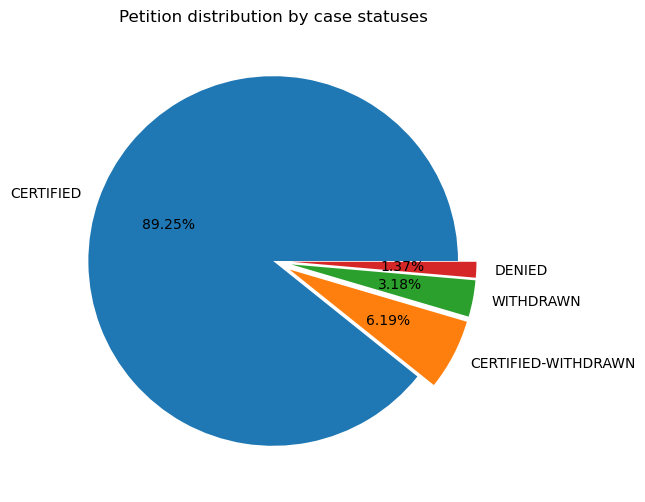

In [54]:
plt.figure(figsize=(8, 6))
plt.pie(df["CASE_STATUS"].value_counts(), labels=df["CASE_STATUS"].value_counts().index, autopct='%1.2f%%', 
        explode=[0, 0.1, 0.1, 0.1])
plt.title("Petition distribution by case statuses")
plt.show()

   ### 2. Top employers filing the petitions

In [56]:
df["EMPLOYER_NAME"].value_counts()

INFOSYS LIMITED                             23799
TATA CONSULTANCY SERVICES LIMITED           23775
DELOITTE CONSULTING LLP                     18579
CAPGEMINI AMERICA INC                       16498
ACCENTURE LLP                               11473
                                            ...  
HEARTLAND EMPLOYMENT SERVICES, LLC D/B/A        1
PRIME HEALTHCARE SERVICES, INC.                 1
THE SARAH JANE BRAIN FOUNDATION                 1
REHABILITATION MASTER, PC                       1
WRWP LLC                                        1
Name: EMPLOYER_NAME, Length: 70045, dtype: int64

   ### 3. Top 15 companies that filed the most visa application

In [57]:
df["EMPLOYER_NAME"].value_counts().head(15)

INFOSYS LIMITED                           23799
TATA CONSULTANCY SERVICES LIMITED         23775
DELOITTE CONSULTING LLP                   18579
CAPGEMINI AMERICA INC                     16498
ACCENTURE LLP                             11473
ERNST & YOUNG U.S. LLP                    11192
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    10096
WIPRO LIMITED                              9289
IBM INDIA PRIVATE LIMITED                  8289
IBM CORPORATION                            5086
JPMORGAN CHASE & CO.                       4619
HCL AMERICA, INC.                          4489
L&T TECHNOLOGY SERVICES LIMITED            4044
TECH MAHINDRA (AMERICAS),INC.              4025
CUMMINS INC.                               3491
Name: EMPLOYER_NAME, dtype: int64

   ### 4. Top employers granting maximum prevailing wages

In [58]:
df.sort_values(by="PREVAILING_WAGE",ascending=False)[['EMPLOYER_NAME','PREVAILING_WAGE']].head(10).reset_index()

,index,EMPLOYER_NAME,PREVAILING_WAGE
0,475470,ADVOCATE HEALTH AND HOSPITALS CORPORATION,297785280.0
1,528379,LUPKIN PLLC,267587840.0
2,172879,3M COMPANY,251796480.0
3,498977,QUINTILES IMS INCORPORATED,247557440.0
4,78407,HSBC SECURITIES (USA) INC.,242971040.0
5,578029,"NTT DATA SERVICES, LLC",232232000.0
6,513595,VICE MEDIA LLC,230293440.0
7,522563,"NTT DATA, INC.",216881600.0
8,519682,"NTT DATA, INC.",216881600.0
9,524269,U.S. CELLULAR CORPORATION,215931040.0


   ### 5. Top 20 states filing highest visa petitions

In [66]:
df["WORKSITE"].str.split(',').str[1].value_counts().head(20)

 NEW YORK        280746
 ILLINOIS        163064
 PENNSYLVANIA    114655
 MICHIGAN        100882
 OHIO             79617
 MINNESOTA        51220
 WISCONSIN        33727
 INDIANA          32785
NEW YORK            172
                    159
 NY                  27
 PA                  26
 IL                  17
 MI                  14
 TROY                 9
 OH                   8
 MN                   5
 MINNEAPOLIS          3
 DEARBORN             3
NY USA                3
Name: WORKSITE, dtype: int64

   ### 6. Petition distribution by year

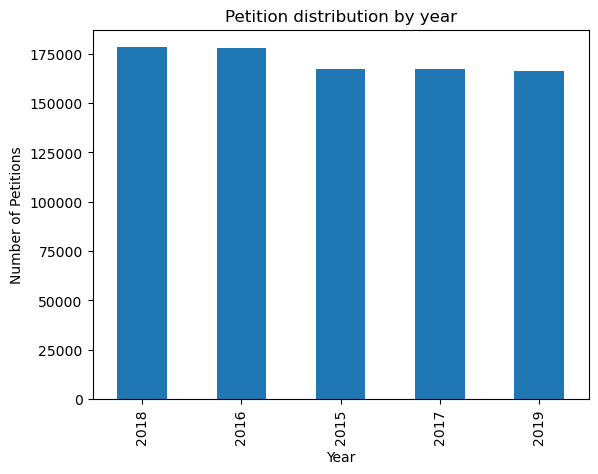

In [70]:
df["YEAR"].value_counts().plot(kind='bar')
plt.title("Petition distribution by year")
plt.xlabel("Year")
plt.ylabel("Number of Petitions")
plt.show()

   ### 7. Number of visa petitions denied

In [71]:
print("Number of visa petitions denied: ", df['CASE_STATUS'].value_counts().loc['DENIED'])

Number of visa petitions denied:  11771


   ### 8. Rate of visas denied from last 5 years

   ### 9. Number of visa petitions filed by states

In [72]:
df['WORKSITE'].str.split(',').str[1].value_counts()

 NEW YORK        280746
 ILLINOIS        163064
 PENNSYLVANIA    114655
 MICHIGAN        100882
 OHIO             79617
                  ...  
 BLDG. 1              1
 SOUTHFIELD           1
 SUITE 201            1
 WEST CHESTER         1
 Brooklyn             1
Name: WORKSITE, Length: 78, dtype: int64

   ### 10. Rate of denial of visa petition by the states

   ### 11. Top 25 job titles

In [73]:
df[["JOB_TITLE"]].value_counts().head(25)

JOB_TITLE                  
PROGRAMMER ANALYST             41003
SOFTWARE ENGINEER              27647
SOFTWARE DEVELOPER             26615
SYSTEMS ANALYST                10922
DEVELOPER                      10227
ASSOCIATE                       9257
COMPUTER PROGRAMMER             9201
BUSINESS ANALYST                9154
CONSULTANT                      8911
SENIOR CONSULTANT               8221
ANALYST                         7805
ASSISTANT PROFESSOR             7399
COMPUTER SYSTEMS ANALYST        6805
PHYSICAL THERAPIST              5930
SENIOR SOFTWARE ENGINEER        5735
SENIOR SYSTEMS ANALYST JC60     5680
PROJECT MANAGER                 5502
SENIOR SOFTWARE DEVELOPER       4760
TECHNOLOGY LEAD - US            4246
DEVELOPER USER INTERFACE        3893
JAVA DEVELOPER                  3755
DATABASE ADMINISTRATOR          3748
ARCHITECT                       3576
MANAGER                         3470
VICE PRESIDENT                  3422
dtype: int64

   ### 12. Top 10 occupations with the highest wages

In [74]:
df.sort_values('PREVAILING_WAGE',ascending=False)[['JOB_TITLE','PREVAILING_WAGE']].head(10).reset_index()

,index,JOB_TITLE,PREVAILING_WAGE
0,475470,MEDICAL PHYSICIST,297785280.0
1,528379,ASSOCIATE ATTORNEY,267587840.0
2,172879,GLOBAL BUSINESS MANAGER,251796480.0
3,498977,ENGAGEMENT MANAGER - IM,247557440.0
4,78407,BUSINESS ANALYST,242971040.0
5,578029,TECHNICAL SOLUTIONS ARCHITECTURE ADVISOR,232232000.0
6,513595,ASSOCIATE STRATEGY DIRECTOR,230293440.0
7,522563,APPLICATION SOFTWARE DEVELOPMENT SENIOR CONSUL...,216881600.0
8,519682,APPLICATION SOFTWARE DEVELOPMENT SENIOR CONSUL...,216881600.0
9,524269,"SOFTWARE TEST ENGINEER III, INFORMATION MANAGE...",215931040.0


   ### 13. To analyse the fraction of full-time and part-time workers